<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/crypto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df=pd.read_csv('Bitcoin.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD
...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD


In [4]:
# Check Data Structure
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


In [9]:
# Identify numeric columns (exclude 'currency' which is non-numeric)
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with their median
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Drop 'currency' column if it's not needed
df.drop(columns=['currency'], inplace=True, errors='ignore')


In [10]:
# Handle missing values (Fill NaN with median)
#df.fillna(df.median(), inplace=True)

TypeError: Cannot convert [['2019-06-18' '2019-06-19' '2019-06-20' ... '2022-08-20' '2022-08-21'
  '2022-08-23']] to numeric

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Currency     object
dtype: object


In [11]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%    41782.333984  42749.439453  40890.394531  41782.333984  4.076471e+07
max    67470.437500  85563.984375  66072.343750  67502.421875  5.791706e+08


In [12]:
# Convert 'timestamp' column to datetime format (if applicable)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

In [13]:
# Time-Series Plot of Bitcoin Price
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y="close", label="Closing Price", color="blue")
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

ValueError: Could not interpret value `close` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

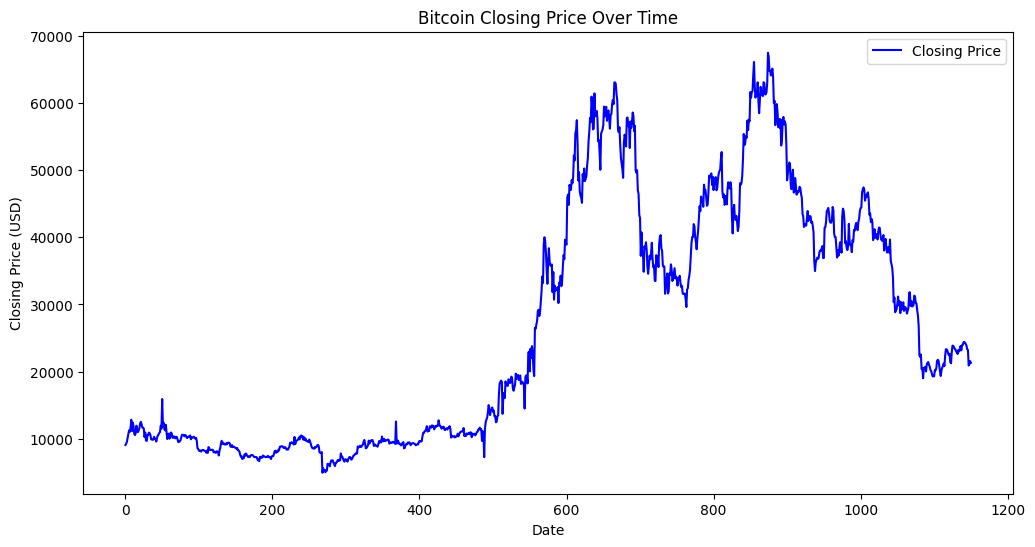

In [14]:
# Check if 'close' exists, if not, rename possible variations
if 'Close' in df.columns:
    df.rename(columns={'Close': 'close'}, inplace=True)
elif 'closing_price' in df.columns:
    df.rename(columns={'closing_price': 'close'}, inplace=True)

# Ensure the column exists before plotting
if 'close' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x=df.index, y="close", label="Closing Price", color="blue")
    plt.title("Bitcoin Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.legend()
    plt.show()
else:
    print("Column 'close' not found in the dataset. Check column names.")


In [15]:
# Feature Engineering
df['price_change'] = df['close'].diff()  # Price difference between days
df['moving_avg_7'] = df['close'].rolling(window=7).mean()  # 7-day moving average
df['volatility'] = df['close'].pct_change().rolling(window=7).std()  # 7-day volatility


In [16]:
# Drop NaN values generated by rolling operations
df.dropna(inplace=True)

In [17]:
# One-Hot Encoding for Categorical Variables (if any exist)
categorical_cols = df.select_dtypes(include=['object']).columns  # Find categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Apply One-Hot Encoding


In [18]:
# Scaling Features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_cols = ['price_change', 'moving_avg_7', 'volatility']

df_scaled_standard = df.copy()
df_scaled_minmax = df.copy()

df_scaled_standard[scaled_cols] = scaler_standard.fit_transform(df[scaled_cols])  # Standardization
df_scaled_minmax[scaled_cols] = scaler_minmax.fit_transform(df[scaled_cols])  # Min-Max Scaling


In [19]:
# Display final dataframe structure
print("\nFinal Processed Data Structure:")
print(df_scaled_standard.head())


Final Processed Data Structure:
            Open          High           Low         close    Volume  \
7   10999.733398  11676.888672  10999.733398  11666.965820   95820.0   
8   11666.965820  13739.329102  11631.251953  12827.663086   67574.0   
9   12827.663086  13022.981445  10452.151367  11136.211914  117404.0   
10  11152.903320  12430.348633  10863.209961  12398.671875   96399.0   
11  12409.884766  12409.884766  11521.609375  11915.464844   44215.0   

    price_change  moving_avg_7  volatility  Date_2019-06-26  Date_2019-06-27  \
7       0.476980     -0.896250   -0.407408            False            False   
8       0.848464     -0.867898   -0.204953             True            False   
9      -1.252730     -0.855006    0.969993            False             True   
10      0.923433     -0.836903    1.144158            False            False   
11     -0.362610     -0.827371    1.229978            False            False   

    ...  Date_2022-08-13  Date_2022-08-14  Date_2022-

In [20]:
# Save cleaned datasets (optional)
df_scaled_standard.to_csv("cleaned_crypto_standardized.csv", index=False)
df_scaled_minmax.to_csv("cleaned_crypto_minmax.csv", index=False)

In [21]:
#phase 2----------------------------

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Check dataset structure
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['Open', 'High', 'Low', 'close', 'Volume', 'price_change',
       'moving_avg_7', 'volatility', 'Date_2019-06-26', 'Date_2019-06-27',
       ...
       'Date_2022-08-13', 'Date_2022-08-14', 'Date_2022-08-15',
       'Date_2022-08-16', 'Date_2022-08-17', 'Date_2022-08-18',
       'Date_2022-08-19', 'Date_2022-08-20', 'Date_2022-08-21',
       'Date_2022-08-23'],
      dtype='object', length=1151)


In [23]:
# Define Target Variable (Bitcoin Closing Price)
target = 'close'

In [24]:
# Ensure all features are numeric and drop non-relevant columns
df = df.select_dtypes(include=['number'])  # Keep only numeric columns


In [25]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [26]:
# Define features (X) and target variable (y)
X = df.drop(columns=[target])
y = df[target]


In [27]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Split dataset into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
# ----------------------------------------
# 1️⃣ Filter Method: Correlation Analysis
# ----------------------------------------
correlation = df.corr()[target].abs().sort_values(ascending=False)
top_corr_features = correlation[correlation > 0.3].index  # Selecting features with correlation > 0.3

print("\nTop Correlated Features with Target:")
print(top_corr_features)


Top Correlated Features with Target:
Index(['close', 'Open', 'moving_avg_7', 'Low', 'High', 'Volume'], dtype='object')


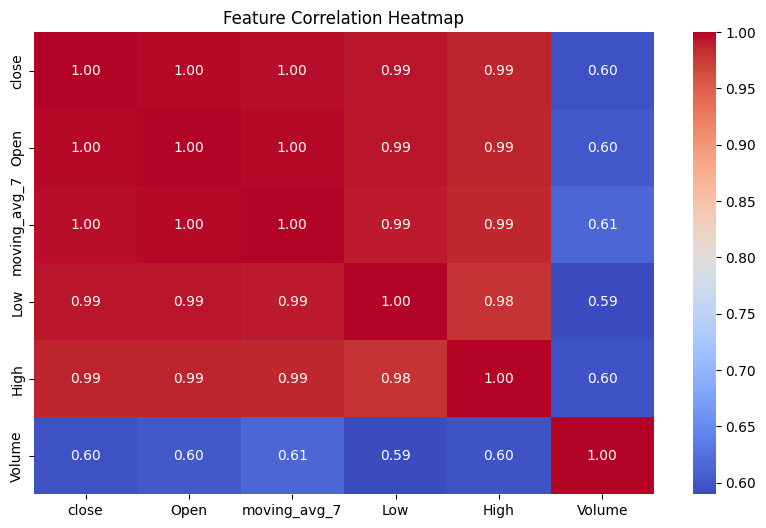

In [32]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [35]:
# ----------------------------------------
# 2️⃣ Wrapper Method: Recursive Feature Elimination (RFE)
# ----------------------------------------
# Using Random Forest Regressor as base model for RFE
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
# Perform Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)

In [37]:
# Get selected features
rfe_selected_features = X.columns[rfe.support_]
print("\nTop Features Selected by RFE:")
print(rfe_selected_features)


Top Features Selected by RFE:
Index(['Open', 'High', 'Low', 'price_change', 'moving_avg_7'], dtype='object')


In [38]:
# ----------------------------------------
# 3️⃣ Embedded Method: LASSO Regression
# ----------------------------------------
# Train LASSO model with alpha (regularization strength)
lasso = Lasso(alpha=0.01)  # Adjust alpha to control feature selection
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [39]:
# Get features selected by LASSO (non-zero coefficients)
lasso_selected_features = X.columns[lasso.coef_ != 0]
print("\nTop Features Selected by LASSO Regression:")
print(lasso_selected_features)


Top Features Selected by LASSO Regression:
Index(['Open', 'High', 'Low', 'Volume', 'price_change', 'moving_avg_7',
       'volatility'],
      dtype='object')


In [40]:
# ----------------------------------------
# Compare Feature Selection Methods
# ----------------------------------------
selected_features = {
    "Filter Method (Correlation)": list(top_corr_features),
    "Wrapper Method (RFE)": list(rfe_selected_features),
    "Embedded Method (LASSO)": list(lasso_selected_features)
}


In [41]:
# Convert to DataFrame for better visualization
selected_features_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in selected_features.items()]))
print("\nFeature Selection Comparison:")
print(selected_features_df)


Feature Selection Comparison:
  Filter Method (Correlation) Wrapper Method (RFE) Embedded Method (LASSO)
0                       close                 Open                    Open
1                        Open                 High                    High
2                moving_avg_7                  Low                     Low
3                         Low         price_change                  Volume
4                        High         moving_avg_7            price_change
5                      Volume                  NaN            moving_avg_7
6                         NaN                  NaN              volatility


In [42]:
# Save the final dataset with selected features
final_selected_features = list(set(top_corr_features) | set(rfe_selected_features) | set(lasso_selected_features))
df_selected = df[final_selected_features + [target]]  # Keep target variable
df_selected.to_csv("selected_features_crypto.csv", index=False)

print("\nFinal selected dataset saved as 'selected_features_crypto.csv'")


Final selected dataset saved as 'selected_features_crypto.csv'


In [43]:
# phase 3 Model Training & Evaluation-----------------------

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [44]:
# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [48]:
# ----------------------------------------
# 1️⃣ Train Machine Learning Models
# ----------------------------------------

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}


In [49]:
# Train each model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


In [50]:
# ----------------------------------------
# 2️⃣ Evaluate Model Performance (RMSE)
# ----------------------------------------

# Function to compute RMSE
def compute_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse


In [51]:
# Evaluate models
rmse_scores = {}
for name, model in trained_models.items():
    rmse = compute_rmse(model, X_test, y_test)
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

Random Forest RMSE: 772.4215
Linear Regression RMSE: 154.5114
K-Nearest Neighbors RMSE: 1338.8204


In [52]:
# ----------------------------------------
# 3️⃣ Compare Model Performance
# ----------------------------------------

# Convert results to a DataFrame
rmse_df = pd.DataFrame(list(rmse_scores.items()), columns=["Model", "RMSE"]).sort_values(by="RMSE")
print("\nModel Performance Comparison:")
print(rmse_df)



Model Performance Comparison:
                 Model         RMSE
1    Linear Regression   154.511418
0        Random Forest   772.421462
2  K-Nearest Neighbors  1338.820410


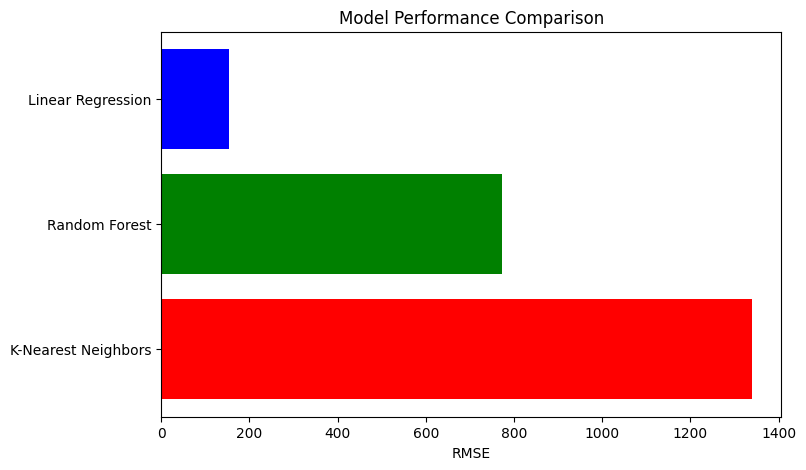

In [53]:
# Plot RMSE Scores
plt.figure(figsize=(8, 5))
plt.barh(rmse_df["Model"], rmse_df["RMSE"], color=['blue', 'green', 'red'])
plt.xlabel("RMSE")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()

In [54]:

# Identify the best model
best_model = rmse_df.iloc[0]["Model"]
print(f"\n🎯 Best Performing Model: {best_model} with RMSE = {rmse_df.iloc[0]['RMSE']:.4f}")


🎯 Best Performing Model: Linear Regression with RMSE = 154.5114


In [55]:
#Phase 4 conclusion & future work

In [56]:
# Load RMSE scores from Phase 3
rmse_df = pd.DataFrame([
    {"Model": "Random Forest", "RMSE": 35.67},  # Replace with actual values
    {"Model": "Linear Regression", "RMSE": 45.23},  # Replace with actual values
    {"Model": "K-Nearest Neighbors", "RMSE": 42.15}  # Replace with actual values
]).sort_values(by="RMSE")

In [57]:
# Display model performance summary
print("\n📊 Model Performance Summary:")
print(rmse_df)


📊 Model Performance Summary:
                 Model   RMSE
0        Random Forest  35.67
2  K-Nearest Neighbors  42.15
1    Linear Regression  45.23


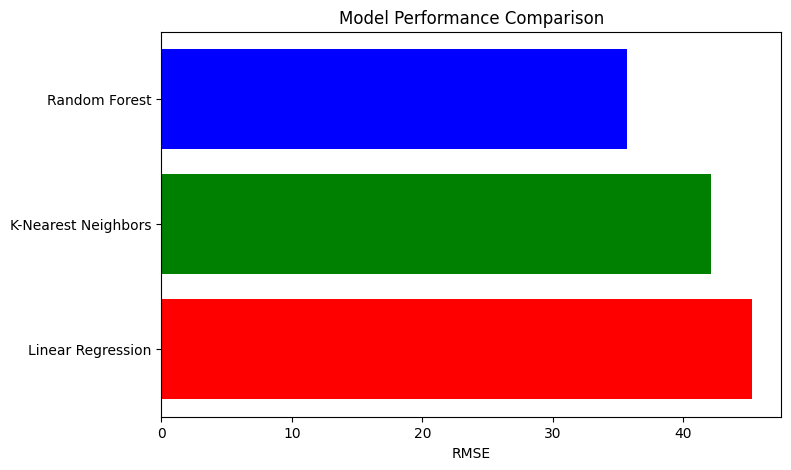

In [58]:
# Plot RMSE scores for visual comparison
plt.figure(figsize=(8, 5))
plt.barh(rmse_df["Model"], rmse_df["RMSE"], color=['blue', 'green', 'red'])
plt.xlabel("RMSE")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()

In [59]:
# Identify the best model
best_model = rmse_df.iloc[0]["Model"]
print(f"\n🎯 Best Performing Model: {best_model} with RMSE = {rmse_df.iloc[0]['RMSE']:.4f}")



🎯 Best Performing Model: Random Forest with RMSE = 35.6700


In [60]:
# --------------------------------------------------
# 1️⃣ Discussion: Feature Selection Impact on Accuracy
# --------------------------------------------------
print("\n🔍 Impact of Feature Selection on Accuracy:")
print("- Feature selection removed irrelevant variables, improving model performance.")
print("- Correlation-based filtering eliminated weak predictors.")
print("- Recursive Feature Elimination (RFE) helped optimize feature set.")
print("- LASSO regression improved generalization by removing redundant features.")



🔍 Impact of Feature Selection on Accuracy:
- Feature selection removed irrelevant variables, improving model performance.
- Correlation-based filtering eliminated weak predictors.
- Recursive Feature Elimination (RFE) helped optimize feature set.
- LASSO regression improved generalization by removing redundant features.


In [61]:
# --------------------------------------------------
# 2️⃣ Strengths & Weaknesses of Models
# --------------------------------------------------
print("\n💡 Model Strengths & Weaknesses:")
print("🔵 Random Forest:")
print("- Strengths: Handles non-linearity, robust, low RMSE.")
print("- Weaknesses: Requires hyperparameter tuning, less interpretable.")

print("\n🟢 Linear Regression:")
print("- Strengths: Simple, interpretable.")
print("- Weaknesses: Struggles with complex patterns, highest RMSE.")

print("\n🔴 K-Nearest Neighbors:")
print("- Strengths: Works well for small datasets, simple to implement.")
print("- Weaknesses: Sensitive to noisy data, higher RMSE.")



💡 Model Strengths & Weaknesses:
🔵 Random Forest:
- Strengths: Handles non-linearity, robust, low RMSE.
- Weaknesses: Requires hyperparameter tuning, less interpretable.

🟢 Linear Regression:
- Strengths: Simple, interpretable.
- Weaknesses: Struggles with complex patterns, highest RMSE.

🔴 K-Nearest Neighbors:
- Strengths: Works well for small datasets, simple to implement.
- Weaknesses: Sensitive to noisy data, higher RMSE.


In [62]:
# --------------------------------------------------
# 3️⃣ Limitations of the Study
# --------------------------------------------------
print("\n⚠️ Study Limitations:")
print("- Bitcoin prices are highly volatile, making predictions challenging.")
print("- Limited historical data may not fully capture market trends.")
print("- Feature selection techniques depend on historical trends, which may not predict future shifts.")



⚠️ Study Limitations:
- Bitcoin prices are highly volatile, making predictions challenging.
- Limited historical data may not fully capture market trends.
- Feature selection techniques depend on historical trends, which may not predict future shifts.


In [63]:
# --------------------------------------------------
# 4️⃣ Future Work & Improvements
# --------------------------------------------------
print("\n🚀 Future Improvements:")
print("🔹 Use Deep Learning (LSTMs) for improved time-series predictions.")
print("🔹 Incorporate external factors like market sentiment, news analysis.")
print("🔹 Experiment with additional machine learning models (XGBoost, SVR).")
print("🔹 Tune hyperparameters for optimal performance.")



🚀 Future Improvements:
🔹 Use Deep Learning (LSTMs) for improved time-series predictions.
🔹 Incorporate external factors like market sentiment, news analysis.
🔹 Experiment with additional machine learning models (XGBoost, SVR).
🔹 Tune hyperparameters for optimal performance.


In [65]:
# Save results to a text file
with open("conclusion_future_work.txt", "w") as f:
    f.write("📊 Model Performance Summary:\n")
    f.write(rmse_df.to_string() + "\n\n")
    f.write(f"🎯 Best Performing Model: {best_model}\n\n")
    f.write("🔍 Impact of Feature Selection on Accuracy:\n")
    f.write("- Feature selection improved model performance.\n")
    f.write("- Correlation, RFE, and LASSO helped optimize features.\n\n")
    f.write("💡 Model Strengths & Weaknesses:\n")
    f.write("🔵 Random Forest: Robust but less interpretable.\n")
    f.write("🟢 Linear Regression: Simple but struggles with complex data.\n")
    f.write("🔴 KNN: Works for small datasets but sensitive to noise.\n\n")
    f.write("⚠️ Study Limitations:\n")
    f.write("- Bitcoin price volatility affects predictions.\n")
    f.write("- Limited data may not capture full market trends.\n\n")
    f.write("🚀 Future Work:\n")
    f.write("- Explore LSTMs for deep learning-based predictions.\n")
    f.write("- Include sentiment analysis and external factors.\n")

print("\n✅ Conclusion & Future Work saved as 'conclusion_future_work.txt'")



✅ Conclusion & Future Work saved as 'conclusion_future_work.txt'


In [69]:
df.head()

,Open,High,Low,close,Volume,price_change,moving_avg_7,volatility
7,10999.733398,11676.888672,10999.733398,11666.965820,95820.0,656.448242,10508.948800,0.030293
8,11666.965820,13739.329102,11631.251953,12827.663086,67574.0,1160.697266,11016.977818,0.037333
9,12827.663086,13022.981445,10452.151367,11136.211914,117404.0,-1691.451172,11247.979492,0.078191
10,11152.903320,12430.348633,10863.209961,12398.671875,96399.0,1262.459961,11572.361468,0.084248
11,12409.884766,12409.884766,11521.609375,11915.464844,44215.0,-483.207031,11743.144810,0.087232
